In [3]:
%matplotlib inline

In [4]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import math

# Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

>[Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra](#scrollTo=qIQwyjrvOBGY)

>>[Problem 1. Polynomial Interpolation](#scrollTo=vo40z3G9vZzX)

>>>[Solution - Separate the interpolating and the plotting function](#scrollTo=YzyVT_o5OBGc)

>>>>[Test interpolation and extrapolation](#scrollTo=JNMfW7QMNV6n)

>>>>[Test - interpolate with smaller degree](#scrollTo=-6v9W-4oMFKa)

>>>>[Test - interpolate with higher degree](#scrollTo=UjXX9U2POBGc)

>>>>[Test - extrapolate with higher degree](#scrollTo=3iAiXLV79581)

>>[Problem 2. Complex Numbers as Vectors](#scrollTo=6LzT4w3wv5I6)

>>[Problem 3. Recursion and Fractals](#scrollTo=_xTvQ3TIOBGf)

>>>>[Endless sequences](#scrollTo=pToUfMTWOBGf)

>>>>[The Mandelbrot set](#scrollTo=C3niKgZdOBGj)

>>>>[Optional problem](#scrollTo=OBeE_foIOBGj)

>>[Problem 4. Run-length Encoding](#scrollTo=np0O0EGCOBGj)

>>[Problem 5. Function Invertibility and Cryptography](#scrollTo=BH8mRDS8OBGk)

>>[Problem 6. Diffie - Hellman Key Exchange Simulation](#scrollTo=Dqi3H-7-OBGk)

>>[** Problem 7. The Galois Field in Cryptography](#scrollTo=YR2BiXUSOBGk)

>>[** Problem 8. Huffman Compression Algorithm](#scrollTo=Xz2smULwOBGl)




## Problem 1. Polynomial Interpolation
Given a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, figure out what function may have generated these points and plot it.

### Solution - Separate the interpolating and the plotting function
Assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

In [39]:
def interpolate_polynomial(points, degree):
  """
  Interpolates a polynomial of the specified degree through the given points
  Input:
    points - a list of points (x, y) to plot
    degree - the polynomial degree
  """
  x = points[:, 0]
  y = points[:, 1]

  return Polynomial.fit(x, y, degree)

Create a generic plotting function that will plot 1 to 4 polynomials in a grid. The goal is to have several plots side by side for easy comparison.

In [47]:
def plot_polynomials(polynomials):
  """
  Plots 1 to 4 polynomials
  Input:
    polynomials - a list of 1 to 4 tuples. Each tuple contains:
      poly - polinomial (the result of function interpolate_polynomial)
      points - a list of points (x, y) to plot (scatter)
      min_x, max_x - range of x values used to plot the interpolating polynomial
  Note: input validity ommited for brevity, the goal of the function is to experiement with polynomials and degree
  """
  colors = ["blue", "orange", "green", "red"]
  num_polynomials = len(polynomials)
  plot_rows = (lambda x: 1 if x in [1, 2, 3] else 2)(num_polynomials)
  plot_cols = (lambda x: x if x in [1, 2, 3] else 2)(num_polynomials)

  fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))
  fig.tight_layout(pad=4)

  for i, (poly, points, min_x, max_x, title) in enumerate(polynomials):
      ax = axes if not isinstance(axes, np.ndarray) else axes[i] if len(axes.shape)==1 else axes[math.floor(i/2),i%2]

      plot_x = np.linspace(min_x, max_x, 1000)
      plot_y = poly(plot_x)

      ax.plot(plot_x, plot_y, f'tab:{colors[i]}')
      ax.scatter(points[:, 0], points[:, 1])

      ax.set_title(title)
      ax.set(xlabel='x', ylabel='y')

#### Test: interpolation and extrapolation

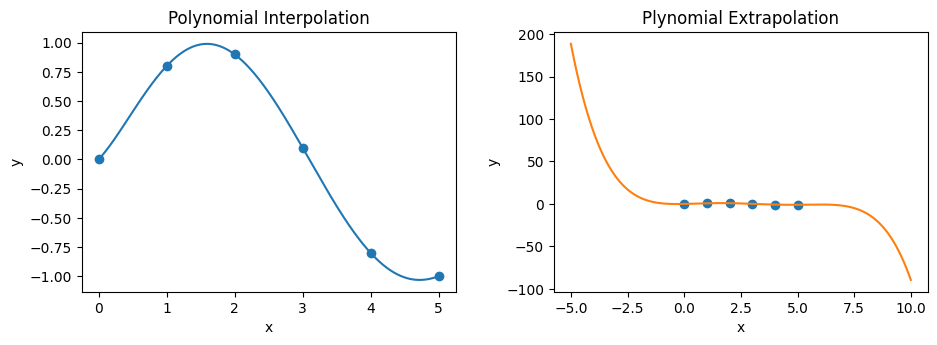

In [48]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
poly = interpolate_polynomial(points, len(points) - 1)

plot_polynomials([(poly, points, np.min(points[:, 0]), np.max(points[:, 0]), "Polynomial Interpolation"), (poly, points, -5, 10, "Plynomial Extrapolation") ])

#### Test: interpolate with smaller degree

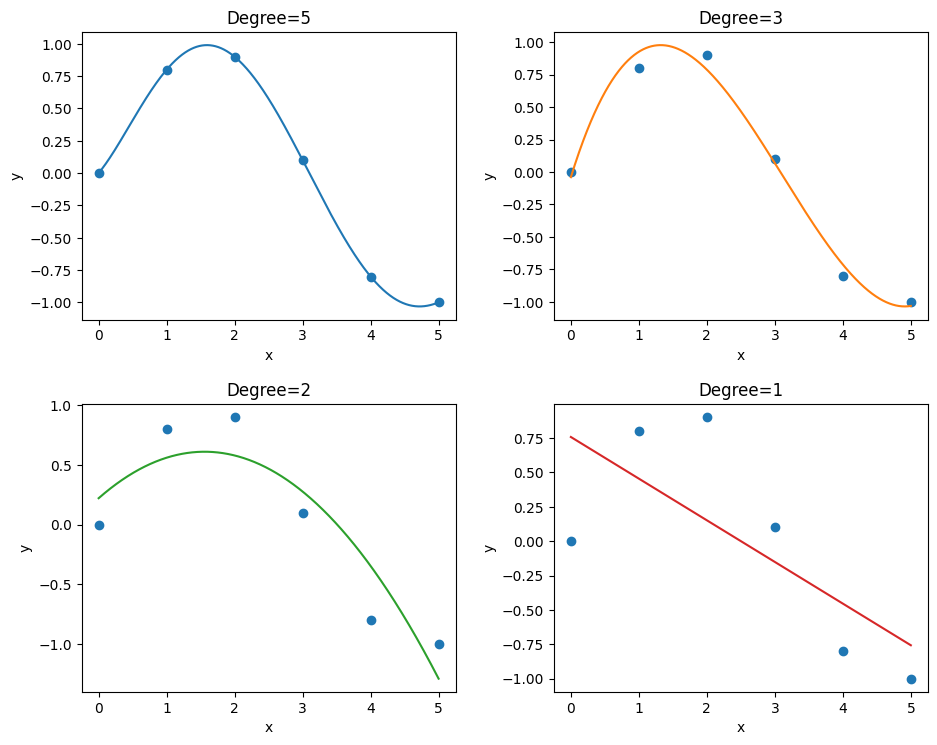

In [49]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 3)
poly2 = interpolate_polynomial(points, 2)
poly3 = interpolate_polynomial(points, 1)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([(poly0, points, *min_max_x, "Degree=5"), (poly1, points, *min_max_x, "Degree=3"), (poly2, points, *min_max_x, "Degree=2"), (poly3, points, *min_max_x, "Degree=1")])

#### Test: interpolate with higher degree

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


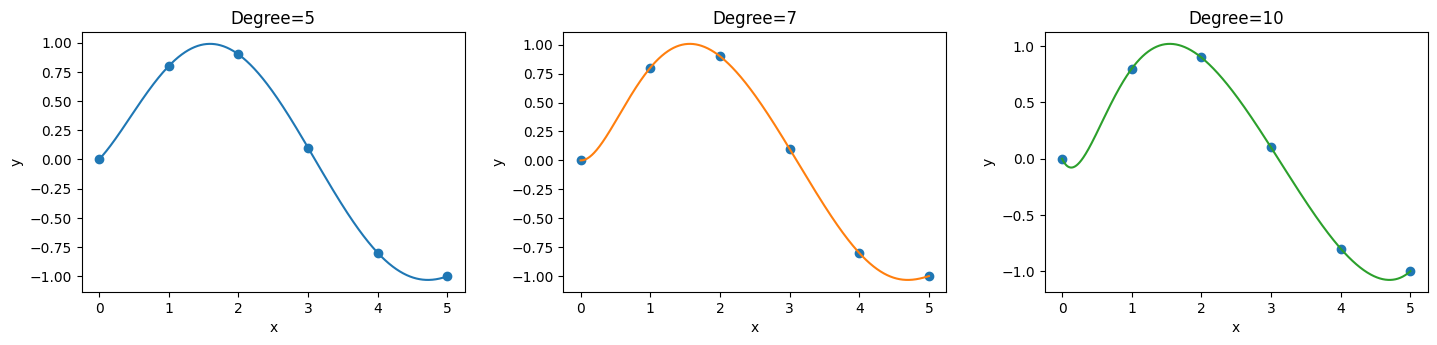

In [69]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([(poly0, points, *min_max_x, "Degree=5"), (poly1, points, *min_max_x, "Degree=7"), (poly2, points, *min_max_x, "Degree=10")])

#### Test: extrapolate with higher degree

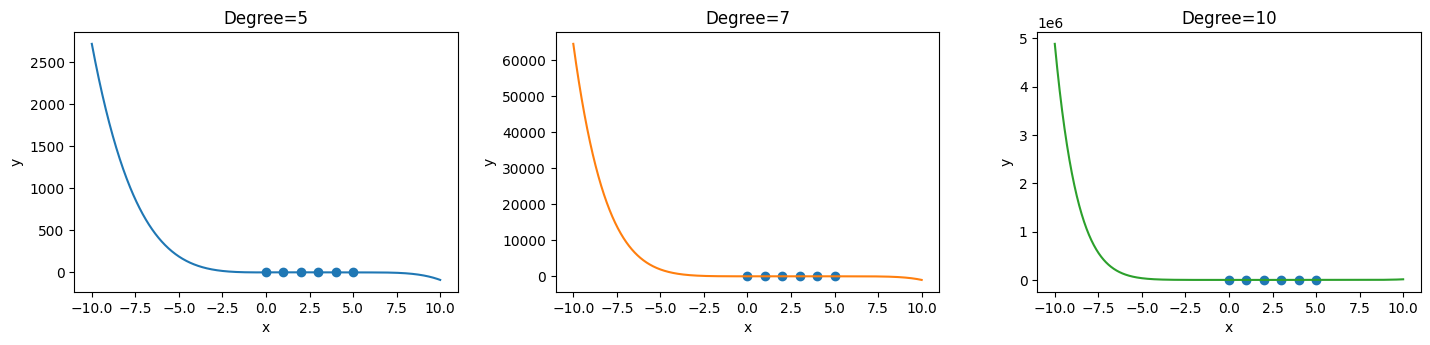

In [50]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

plot_polynomials([(poly0, points, -10, 10, "Degree=5"), (poly1, points, -10, 10, "Degree=7"), (poly2, points, -10, 10, "Degree=10")])

## Problem 2. Complex Numbers as Vectors
Plot complex numbers as radius vectors.

### Solution
Functions to plot a single complex number and a list of complex numbers:

In [5]:
# 👉DELETEME!
def plot_complex_number_orig(z):
  """
  Plots a single complex number z as a radius vector in the 2D space
  """
  plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
  plt.xticks(range(-4, 5))
  plt.yticks(range(-4, 5))
# 👉DELETEME!
def plot_complex_numbers_orig(numbers, colors):
  """
  Plots the given list of complex numbers as radius vectors in the 2D space
  """
  x1 = [0] * len(numbers)
  y1 = [0]* len(numbers)
  x2 = [z.real for z in numbers]
  y2 = [z.imag for z in numbers]
  plt.quiver(x1, y1, x2, y2, angles = "xy", scale_units = "xy", scale = 1, color = colors)

  plt.xticks(range(-4, 5))
  plt.yticks(range(-4, 5))

def plot_complex_number(subplot, z):
  """
  Plots a single complex number z as a radius vector in the passed 2D subplot
  """
  subplot.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
  subplot.set_xticks(range(-4, 5))
  subplot.set_yticks(range(-4, 5))

def plot_complex_numbers(subplot, numbers, colors):
  """
  Plots the given list of complex numbers as radius vectors in the passed 2D subplot
  """
  x1 = [0] * len(numbers)
  y1 = [0] * len(numbers)
  x2 = [z.real for z in numbers]
  y2 = [z.imag for z in numbers]
  subplot.quiver(x1, y1, x2, y2, angles = "xy", scale_units = "xy", scale = 1, color = colors)

  subplot.set_xticks(range(-4, 5))
  subplot.set_yticks(range(-4, 5))


#### Test: plot single complex number and a list of complex numbers:

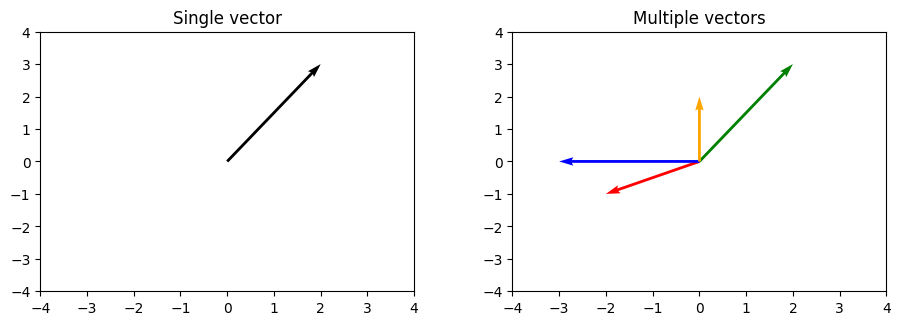

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5*2, 4*1))
fig.tight_layout(pad=4)

ax1.set_title("Single vector")
plot_complex_number(ax1, 2 + 3j)

ax2.set_title("Multiple vectors")
plot_complex_numbers(ax2, [2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

#### Test: adding complex numbers

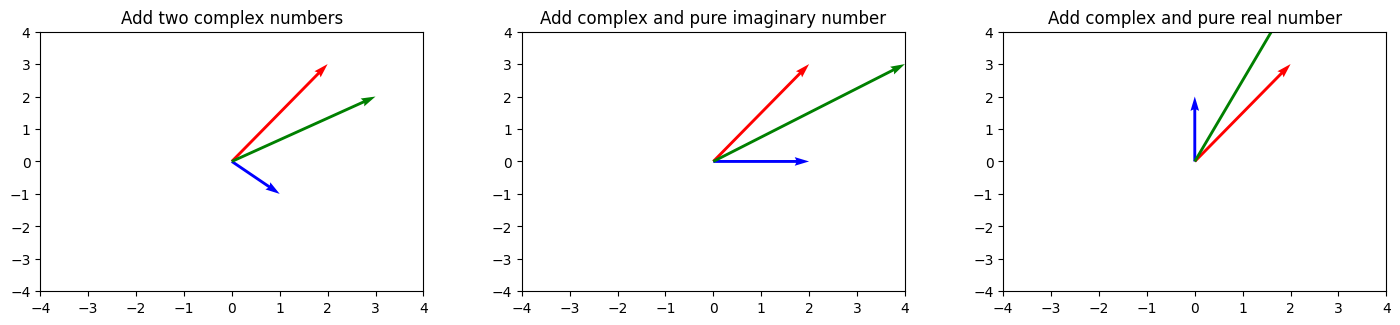

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5*3, 4*1))
fig.tight_layout(pad=4)

ax1.set_title("Add two complex numbers")
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers(ax1, [z1, z2, z1 + z2], ["red", "blue", "green"])

ax2.set_title("Add complex and pure imaginary number")
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers(ax2, [z1, z2, z1 + z2], ["red", "blue", "green"])

ax3.set_title("Add complex and pure real number")
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers(ax3, [z1, z2, z1 + z2], ["red", "blue", "green"])

#### Test: multiplying complex numbers

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5*2, 4*2))
fig.tight_layout(pad=4)

z = 2 + 3j
ax1.set_title("Multiply complex number by 1")
plot_complex_numbers(ax1, [z, z * 1], ["red", "blue"])

ax2.set_title("Multiply complex number by -1")
plot_complex_numbers(ax2, [z, z * -1], ["red", "blue"])

ax3.set_title("Multiply complex number by j")
plot_complex_numbers(ax3, [z, z * 1j], ["red", "blue"])

ax4.set_title("Multiply complex number by -j")
plot_complex_numbers(ax4, [z, z * -1j], ["red", "blue"])

## Problem 3. Recursion and Fractals

⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬

## Problem 3. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [ ]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    # Write your code here
    pass

def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    # Write your code here
    pass

#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [ ]:
def nat():
    """Returns all natural numbers"""
    pass

def even()
    """Returns all even numbers"""
    pass

Use the approach above to rewrite the factorial function in a "lazy" way.

In [ ]:
def factorial_new(n):
    # Write your own docstring as showing it here will be too much of a hint :)
    # Don't forget to also write the code :D
    pass

Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics.

In [ ]:
def fibonacci(n):
    # Write your docstring and code
    pass

#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

In [ ]:
# Write your code here

#### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules.

In [ ]:
# Write your code here

## Problem 4. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [ ]:
def encode(text):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    pass

def decode(text):
    """
    Decodes the text using run-length encoding
    """
    pass

In [ ]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

## * Problem 5. Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [ ]:
# Write your code here

## * Problem 6. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

In [ ]:
# Write your code here

## ** Problem 7. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

## ** Problem 8. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?

# Mirka

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [ ]:
# A figure with just one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

In [ ]:
# Stack vertically
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

In [ ]:
# Stack horizontally
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)
# ax3.plot(x, y)

In [ ]:
# Stack horizontally and vertically 2
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")

axs[0, 1].plot(x + 1, y + 1, 'tab:orange')
axs[0, 1].set_title("unrelated")

axs[1, 0].plot(x, y**2, 'tab:green')
axs[1, 0].set_title("shares x with main")

axs[1, 1].plot(x + 2, y + 2, 'tab:red')
axs[1, 1].set_title("also unrelated")
fig.tight_layout()